In [58]:
# Cell 1 - Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Cell 2 - Load data
df = pd.read_csv("data/bank_transactions_data_2.csv")
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
df.head()

Dataset shape: (2512, 16)

Column names:
['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [60]:
# Cell 3 - Check for fraud column and basic info
print("Checking for fraud-related columns...")
fraud_cols = [col for col in df.columns if 'fraud' in col.lower() or 'flag' in col.lower() or 'label' in col.lower()]
print(f"Potential fraud columns: {fraud_cols}")

# Check data types and missing values
print("\nData Info:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

Checking for fraud-related columns...
Potential fraud columns: []

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  

In [61]:
# Cell 4 - Convert date columns to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Extract datetime features
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['Month'] = df['TransactionDate'].dt.month
df['DayOfMonth'] = df['TransactionDate'].dt.day

# Calculate time since previous transaction
df['TimeSincePrevious'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600  # in hours

print("Date columns converted and features extracted")
print(f"New columns added: {['Hour', 'DayOfWeek', 'Month', 'DayOfMonth', 'TimeSincePrevious']}")

Date columns converted and features extracted
New columns added: ['Hour', 'DayOfWeek', 'Month', 'DayOfMonth', 'TimeSincePrevious']


In [62]:
# Cell 5 - Univariate Analysis: Numerical Features Summary
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                     'LoginAttempts', 'AccountBalance', 'TimeSincePrevious']

print("NUMERICAL FEATURES SUMMARY")
print("="*80)
for feature in numerical_features:
    print(f"\n{feature}:")
    print(df[feature].describe())
    print(f"Skewness: {df[feature].skew():.3f}")
    print(f"Kurtosis: {df[feature].kurtosis():.3f}")

NUMERICAL FEATURES SUMMARY

TransactionAmount:
count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64
Skewness: 1.740
Kurtosis: 3.643

CustomerAge:
count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64
Skewness: 0.148
Kurtosis: -1.224

TransactionDuration:
count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64
Skewness: 0.599
Kurtosis: -0.259

LoginAttempts:
count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAtte

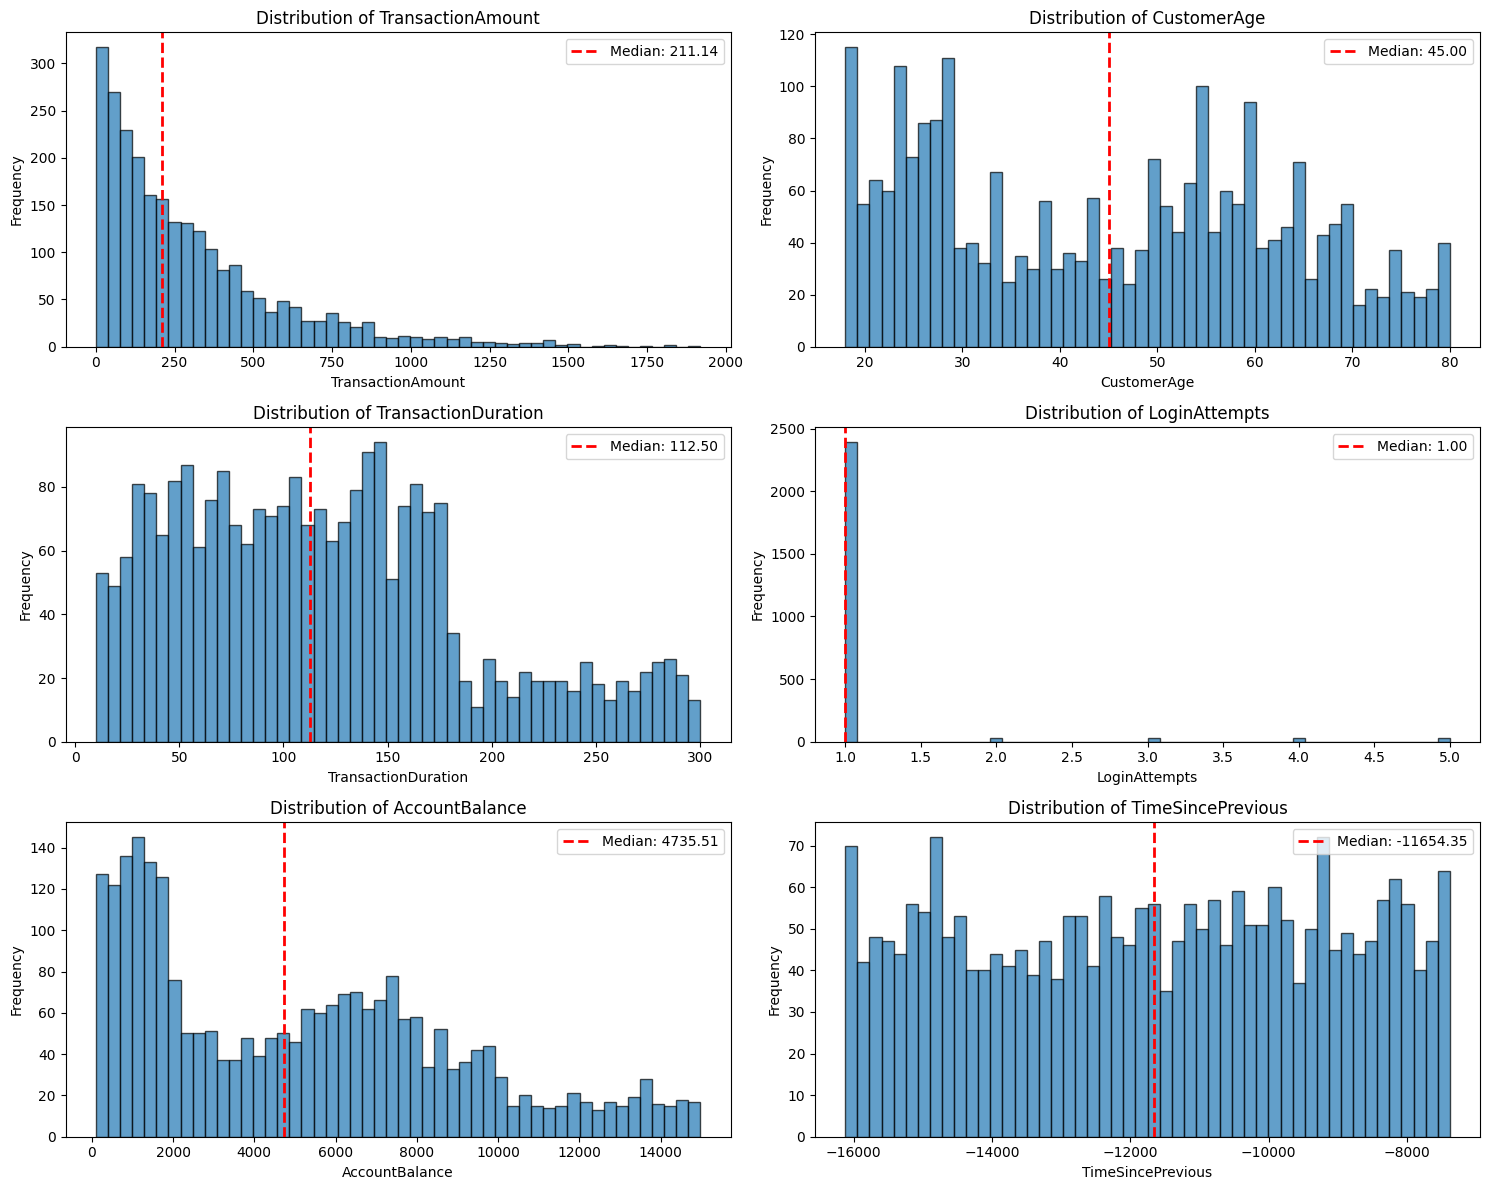

In [63]:
# Cell 6 - Visualize numerical distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    
    # Add median line
    median_val = df[feature].median()
    axes[idx].axvline(median_val, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [64]:
# Cell 7 - Detect outliers in numerical features using IQR method
print("OUTLIER ANALYSIS")
print("="*80)

outlier_summary = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    outlier_summary[feature] = {
        'count': len(outliers),
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{feature}:")
    print(f"  Outliers: {len(outliers)} ({outlier_percentage:.2f}%)")
    print(f"  Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    if len(outliers) > 0:
        print(f"  Outlier range: [{outliers[feature].min():.2f}, {outliers[feature].max():.2f}]")

OUTLIER ANALYSIS

TransactionAmount:
  Outliers: 113 (4.50%)
  Normal range: [-417.08, 913.49]
  Outlier range: [917.81, 1919.11]

CustomerAge:
  Outliers: 0 (0.00%)
  Normal range: [-21.00, 107.00]

TransactionDuration:
  Outliers: 0 (0.00%)
  Normal range: [-84.00, 308.00]

LoginAttempts:
  Outliers: 122 (4.86%)
  Normal range: [1.00, 1.00]
  Outlier range: [2.00, 5.00]

AccountBalance:
  Outliers: 0 (0.00%)
  Normal range: [-7757.30, 16940.49]

TimeSincePrevious:
  Outliers: 0 (0.00%)
  Normal range: [-20635.34, -2769.89]


In [65]:
# Cell 8 - Categorical Features Analysis
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'MerchantID']

print("CATEGORICAL FEATURES SUMMARY")
print("="*80)

for feature in categorical_features:
    print(f"\n{feature}:")
    print(f"  Unique values: {df[feature].nunique()}")
    print(f"  Top 5 values:")
    value_counts = df[feature].value_counts()
    for value, count in value_counts.head().items():
        print(f"    {value}: {count} ({count/len(df)*100:.2f}%)")

CATEGORICAL FEATURES SUMMARY

TransactionType:
  Unique values: 2
  Top 5 values:
    Debit: 1944 (77.39%)
    Credit: 568 (22.61%)

Location:
  Unique values: 43
  Top 5 values:
    Fort Worth: 70 (2.79%)
    Los Angeles: 69 (2.75%)
    Oklahoma City: 68 (2.71%)
    Charlotte: 68 (2.71%)
    Philadelphia: 67 (2.67%)

Channel:
  Unique values: 3
  Top 5 values:
    Branch: 868 (34.55%)
    ATM: 833 (33.16%)
    Online: 811 (32.29%)

CustomerOccupation:
  Unique values: 4
  Top 5 values:
    Student: 657 (26.15%)
    Doctor: 631 (25.12%)
    Engineer: 625 (24.88%)
    Retired: 599 (23.85%)

MerchantID:
  Unique values: 100
  Top 5 values:
    M026: 45 (1.79%)
    M066: 34 (1.35%)
    M028: 33 (1.31%)
    M014: 33 (1.31%)
    M065: 33 (1.31%)


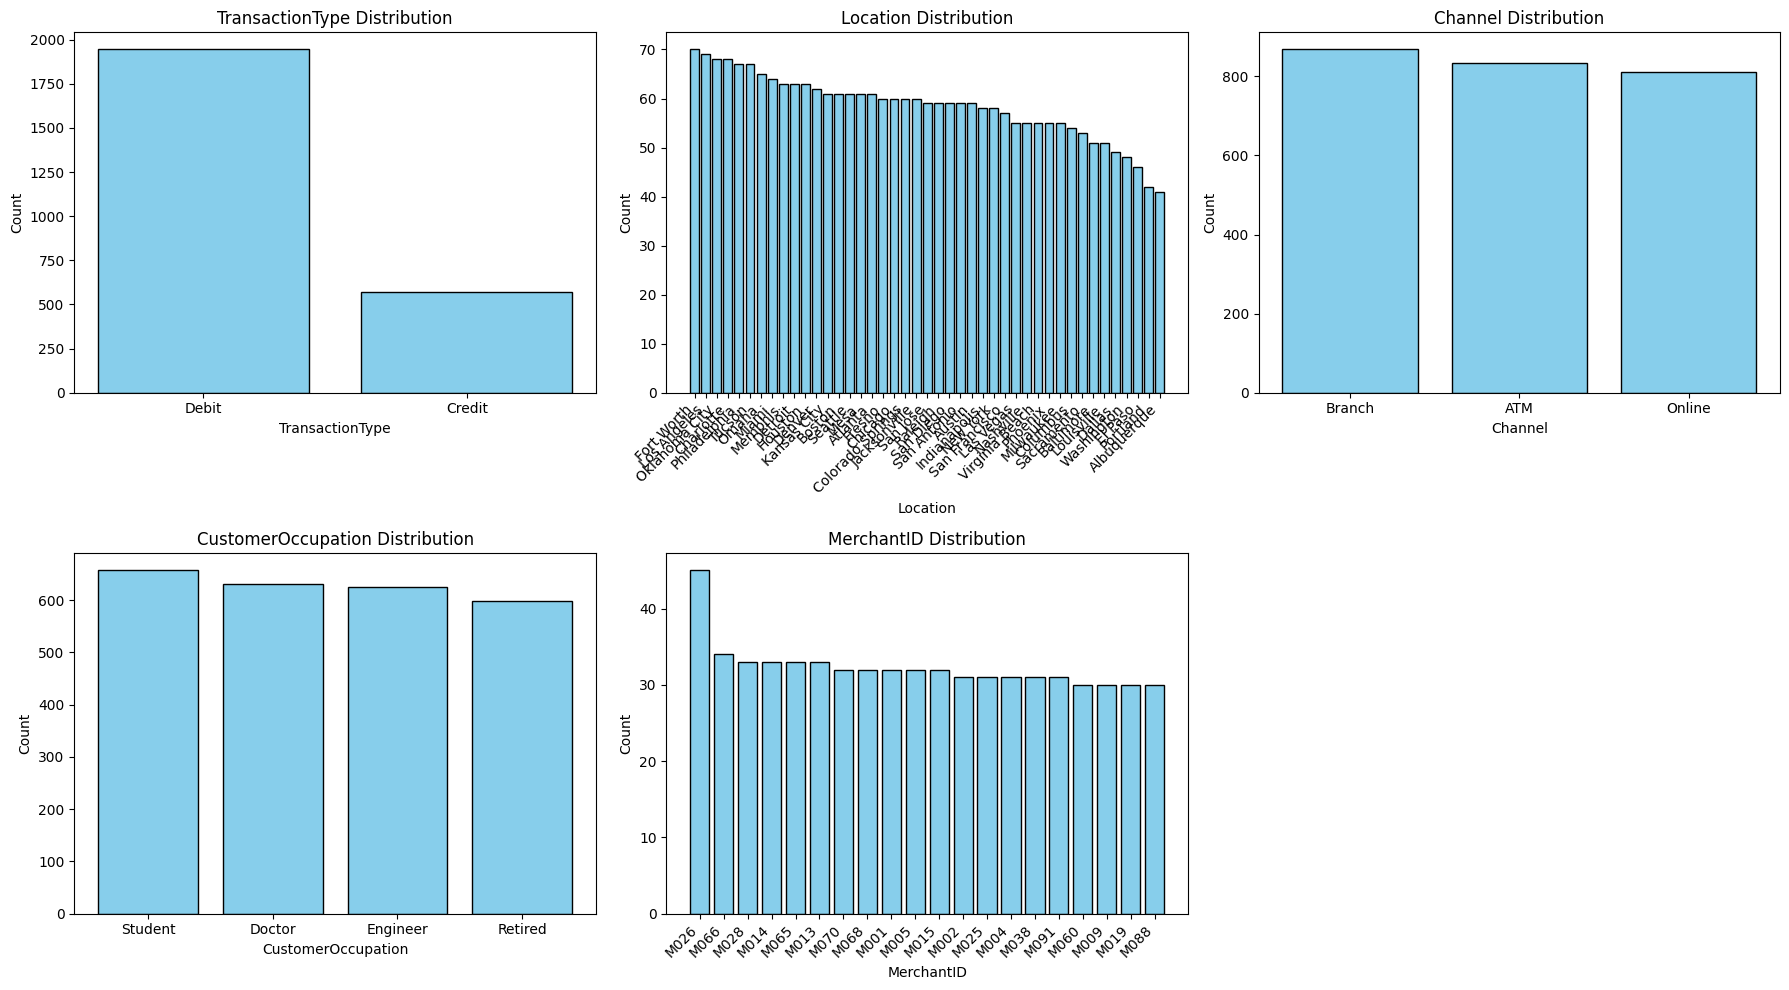

In [66]:
# Cell 9 - Visualize categorical distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features[:5]):
    if feature == 'MerchantID':
        # For MerchantID, show top 20
        top_values = df[feature].value_counts().head(20)
    else:
        top_values = df[feature].value_counts()
    
    axes[idx].bar(range(len(top_values)), top_values.values, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{feature} Distribution')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    
    # Rotate x-labels for better readability
    if len(top_values) > 5:
        axes[idx].set_xticks(range(len(top_values)))
        axes[idx].set_xticklabels(top_values.index, rotation=45, ha='right')
    else:
        axes[idx].set_xticks(range(len(top_values)))
        axes[idx].set_xticklabels(top_values.index)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [67]:
# Cell 10 - Temporal Analysis
print("TEMPORAL PATTERNS ANALYSIS")
print("="*80)

# Hourly patterns
hourly_counts = df['Hour'].value_counts().sort_index()
print("\nTransactions by Hour:")
for hour, count in hourly_counts.items():
    print(f"  Hour {hour:02d}: {count} ({count/len(df)*100:.2f}%)")

# Day of week patterns
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['DayOfWeek'].value_counts().sort_index()
print("\nTransactions by Day of Week:")
for day, count in dow_counts.items():
    print(f"  {day_names[day]}: {count} ({count/len(df)*100:.2f}%)")

# Monthly patterns
monthly_counts = df['Month'].value_counts().sort_index()
print("\nTransactions by Month:")
for month, count in monthly_counts.items():
    print(f"  Month {month}: {count} ({count/len(df)*100:.2f}%)")

TEMPORAL PATTERNS ANALYSIS

Transactions by Hour:
  Hour 16: 1316 (52.39%)
  Hour 17: 819 (32.60%)
  Hour 18: 377 (15.01%)

Transactions by Day of Week:
  Monday: 1070 (42.60%)
  Tuesday: 360 (14.33%)
  Wednesday: 341 (13.57%)
  Thursday: 368 (14.65%)
  Friday: 373 (14.85%)

Transactions by Month:
  Month 1: 220 (8.76%)
  Month 2: 218 (8.68%)
  Month 3: 197 (7.84%)
  Month 4: 161 (6.41%)
  Month 5: 220 (8.76%)
  Month 6: 212 (8.44%)
  Month 7: 195 (7.76%)
  Month 8: 224 (8.92%)
  Month 9: 214 (8.52%)
  Month 10: 226 (9.00%)
  Month 11: 221 (8.80%)
  Month 12: 204 (8.12%)


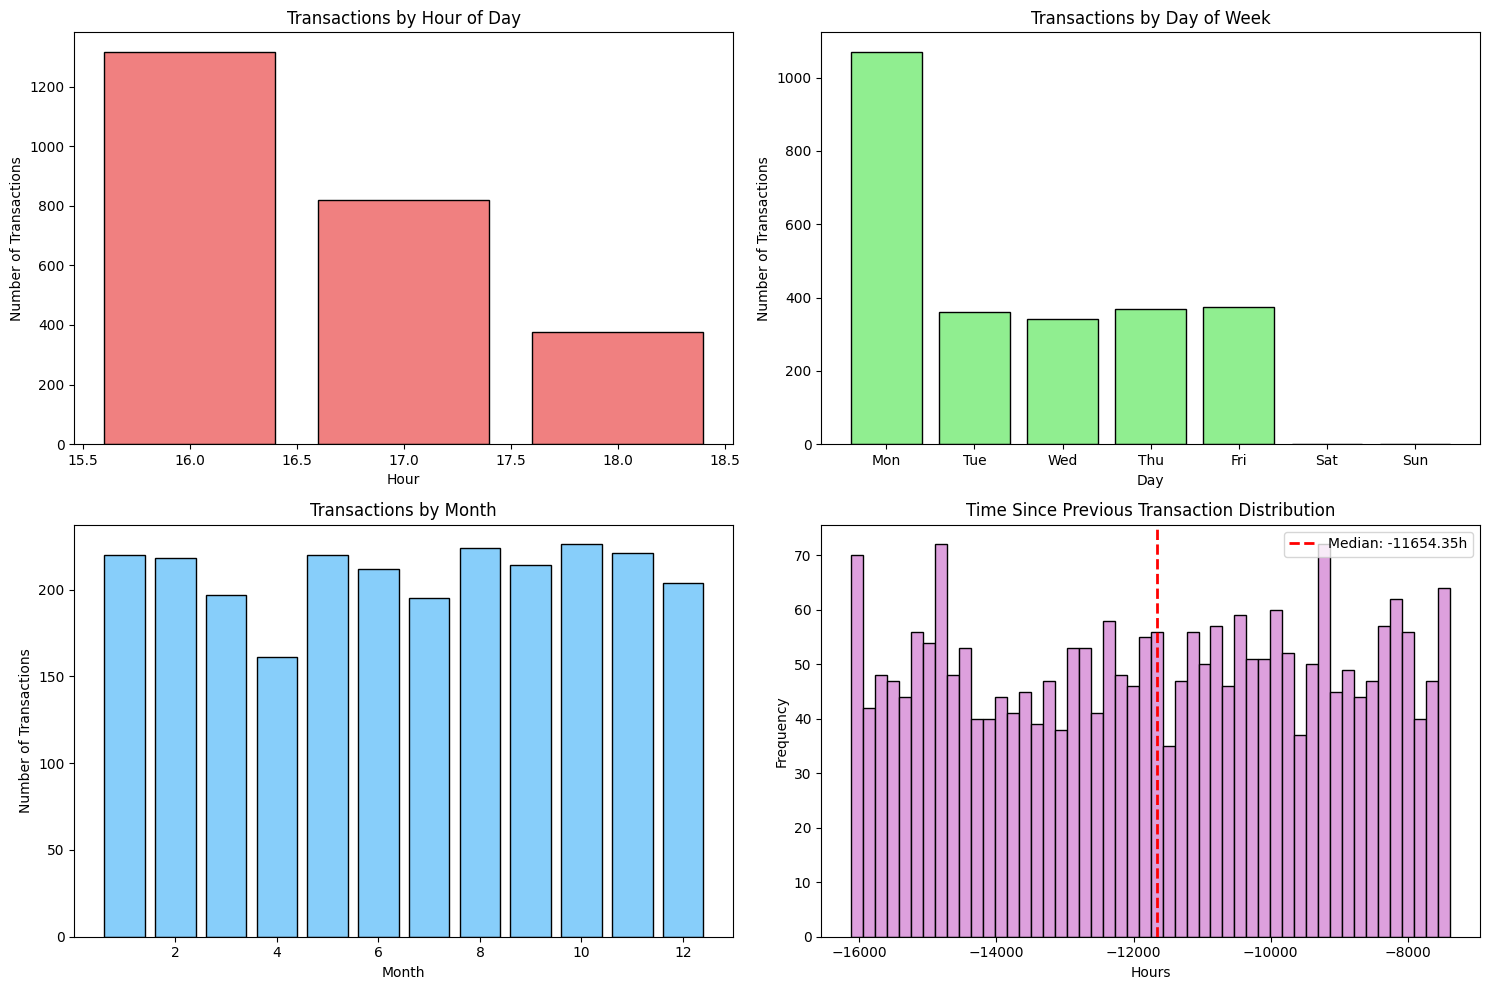

In [68]:
# Cell 11 - Visualize temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hourly distribution
hourly_counts = df['Hour'].value_counts().sort_index()
axes[0, 0].bar(hourly_counts.index, hourly_counts.values, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Transactions by Hour of Day')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Number of Transactions')

# Day of week distribution - ensure all days are present
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_counts = df['DayOfWeek'].value_counts().sort_index()
# Create a series with all days (0-6) and fill missing days with 0
all_days_counts = pd.Series([dow_counts.get(i, 0) for i in range(7)], index=range(7))
axes[0, 1].bar(day_names, all_days_counts.values, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Transactions by Day of Week')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Number of Transactions')

# Monthly distribution
monthly_counts = df['Month'].value_counts().sort_index()
axes[1, 0].bar(monthly_counts.index, monthly_counts.values, color='lightskyblue', edgecolor='black')
axes[1, 0].set_title('Transactions by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Transactions')

# Time since previous transaction distribution
axes[1, 1].hist(df['TimeSincePrevious'], bins=50, color='plum', edgecolor='black')
axes[1, 1].set_title('Time Since Previous Transaction Distribution')
axes[1, 1].set_xlabel('Hours')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(df['TimeSincePrevious'].median(), color='red', linestyle='dashed', 
                   linewidth=2, label=f'Median: {df["TimeSincePrevious"].median():.2f}h')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [69]:
# Cell 12 - Identify potential fraud indicators based on anomalies
print("POTENTIAL FRAUD INDICATORS (Based on Anomalies)")
print("="*80)

# High-risk transactions based on multiple factors
high_risk_conditions = []

# 1. Very high transaction amounts
high_amount_threshold = df['TransactionAmount'].quantile(0.95)
high_risk_conditions.append(f"High transaction amount (> ${high_amount_threshold:.2f})")

# 2. Multiple login attempts
multiple_login_threshold = 2
high_risk_conditions.append(f"Multiple login attempts (> {multiple_login_threshold})")

# 3. Unusual hours (late night/early morning)
unusual_hours = [0, 1, 2, 3, 4, 5]
high_risk_conditions.append(f"Unusual hours ({unusual_hours})")

# 4. Very quick successive transactions
quick_transaction_threshold = 0.5  # 30 minutes
high_risk_conditions.append(f"Quick successive transactions (< {quick_transaction_threshold} hours)")

print("\nRisk Indicators:")
for condition in high_risk_conditions:
    print(f"  • {condition}")

# Create a risk score
df['risk_score'] = 0

# Add points for each risk factor
df.loc[df['TransactionAmount'] > high_amount_threshold, 'risk_score'] += 1
df.loc[df['LoginAttempts'] > multiple_login_threshold, 'risk_score'] += 1
df.loc[df['Hour'].isin(unusual_hours), 'risk_score'] += 1
df.loc[df['TimeSincePrevious'] < quick_transaction_threshold, 'risk_score'] += 1

# Account balance to transaction amount ratio
df['amount_to_balance_ratio'] = df['TransactionAmount'] / df['AccountBalance']
high_ratio_threshold = df['amount_to_balance_ratio'].quantile(0.95)
df.loc[df['amount_to_balance_ratio'] > high_ratio_threshold, 'risk_score'] += 1

print("\nRisk Score Distribution:")
risk_distribution = df['risk_score'].value_counts().sort_index()
for score, count in risk_distribution.items():
    print(f"  Score {score}: {count} transactions ({count/len(df)*100:.2f}%)")

# Identify highest risk transactions
high_risk_transactions = df[df['risk_score'] >= 3]
print(f"\nHigh-risk transactions (score >= 3): {len(high_risk_transactions)} ({len(high_risk_transactions)/len(df)*100:.2f}%)")

POTENTIAL FRAUD INDICATORS (Based on Anomalies)

Risk Indicators:
  • High transaction amount (> $878.18)
  • Multiple login attempts (> 2)
  • Unusual hours ([0, 1, 2, 3, 4, 5])
  • Quick successive transactions (< 0.5 hours)

Risk Score Distribution:
  Score 1: 2199 transactions (87.54%)
  Score 2: 281 transactions (11.19%)
  Score 3: 30 transactions (1.19%)
  Score 4: 2 transactions (0.08%)

High-risk transactions (score >= 3): 32 (1.27%)


Goal 1: Build a robust classification model to accurately identify whether a given transaction is fraudulent or not.

MULTIVARIATE ANALYSIS

1. CORRELATION ANALYSIS


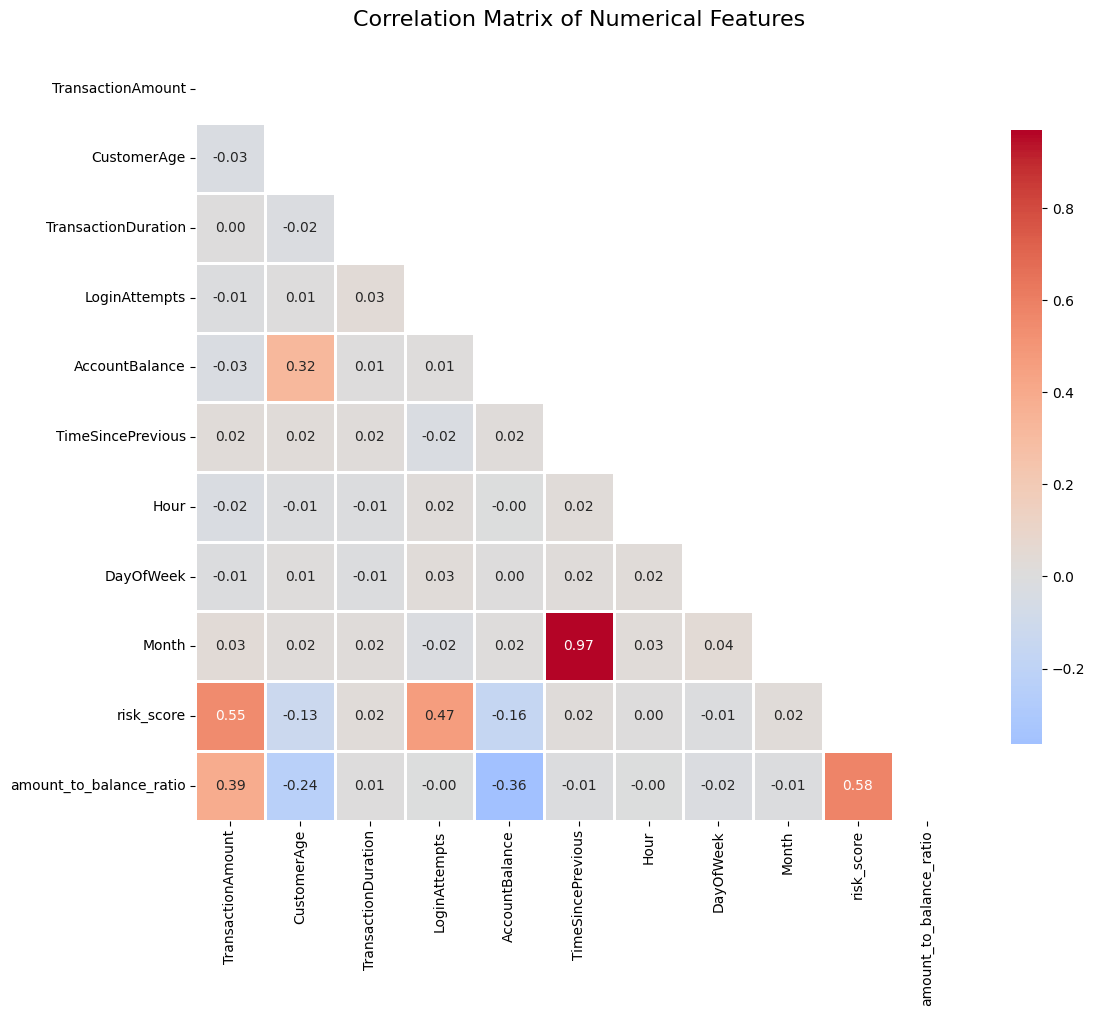


Strong Correlations (|r| > 0.3):
  TimeSincePrevious <-> Month: 0.968
  risk_score <-> amount_to_balance_ratio: 0.582
  TransactionAmount <-> risk_score: 0.552
  LoginAttempts <-> risk_score: 0.467
  TransactionAmount <-> amount_to_balance_ratio: 0.390
  AccountBalance <-> amount_to_balance_ratio: -0.363
  CustomerAge <-> AccountBalance: 0.320


In [70]:
# Cell 14 - Multivariate Analysis: Correlation Matrix
print("MULTIVARIATE ANALYSIS")
print("="*80)
print("\n1. CORRELATION ANALYSIS")

# Select numerical features for correlation analysis
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                  'LoginAttempts', 'AccountBalance', 'TimeSincePrevious',
                  'Hour', 'DayOfWeek', 'Month', 'risk_score', 'amount_to_balance_ratio']

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Find strong correlations (excluding self-correlations)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.3:
            strong_corr.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

print("\nStrong Correlations (|r| > 0.3):")
for corr in sorted(strong_corr, key=lambda x: abs(x['Correlation']), reverse=True):
    print(f"  {corr['Feature 1']} <-> {corr['Feature 2']}: {corr['Correlation']:.3f}")


2. RISK SCORE ANALYSIS BY MULTIPLE DIMENSIONS


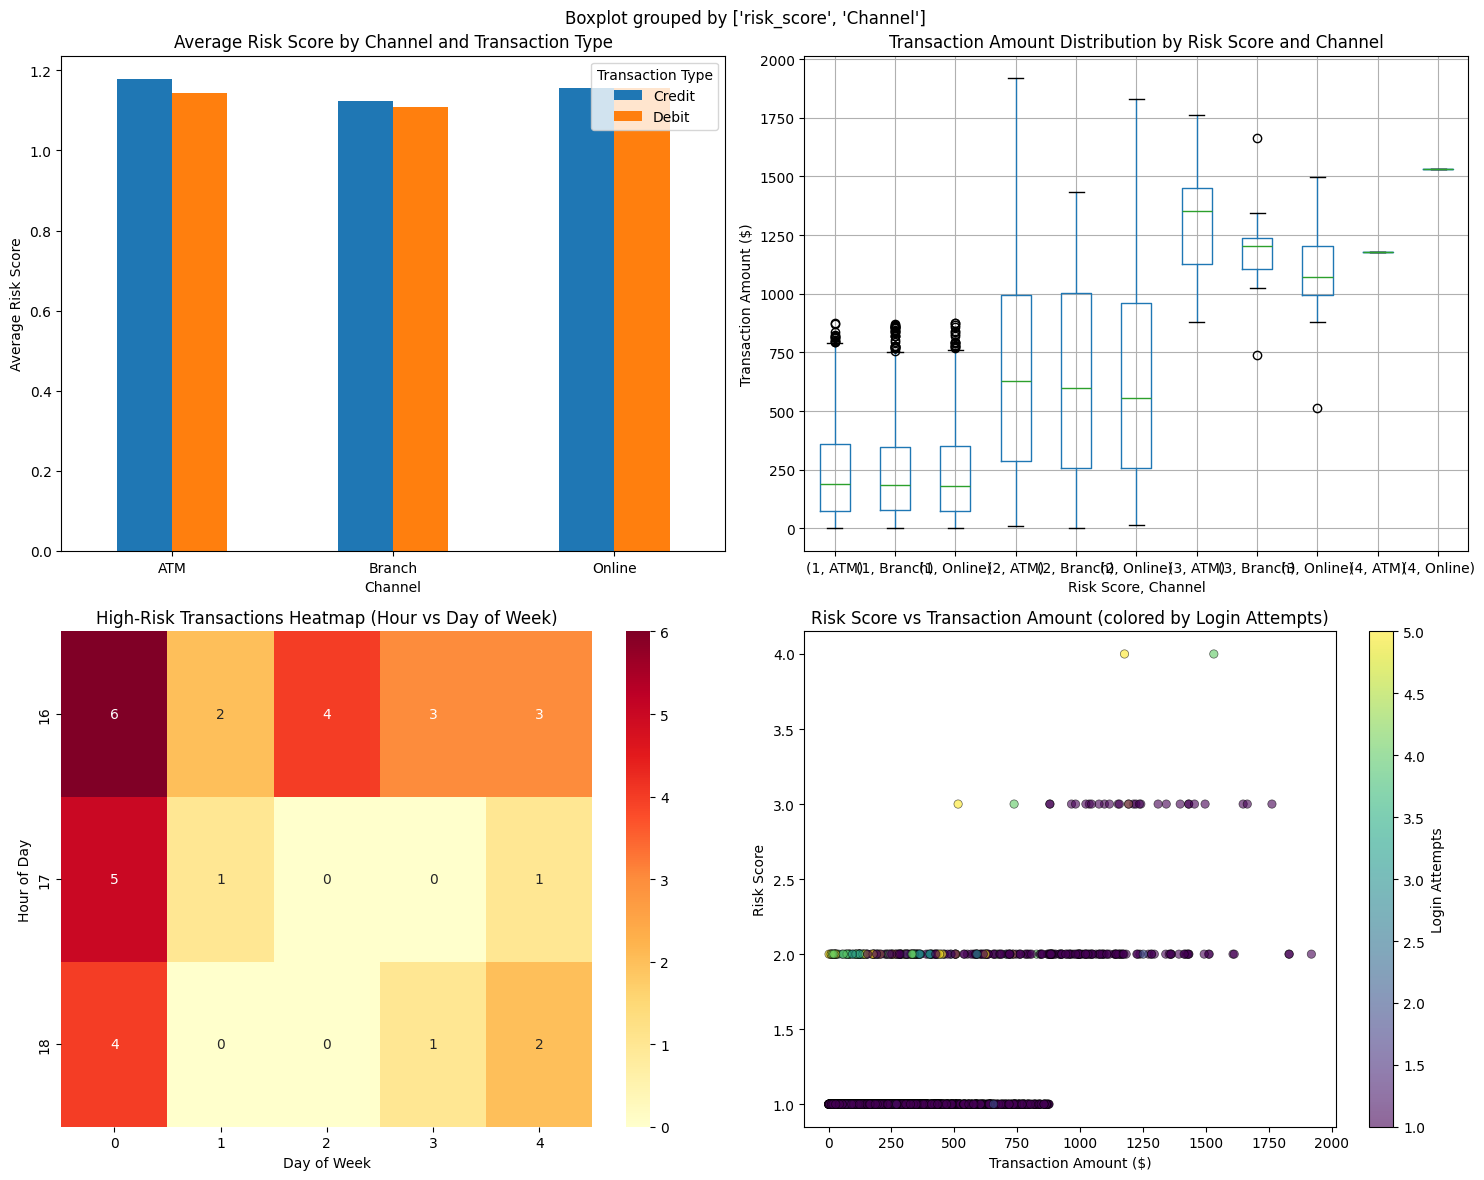


High-Risk Transaction Characteristics (Risk Score >= 3):
  Total high-risk transactions: 32
  Average transaction amount: $1206.27
  Average login attempts: 1.56
  Most common channel: ATM
  Most common hour: 16


In [71]:
# Cell 15 - Multivariate Analysis: Risk Score by Multiple Features
print("\n2. RISK SCORE ANALYSIS BY MULTIPLE DIMENSIONS")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Risk Score by Channel and Transaction Type
risk_by_channel_type = df.groupby(['Channel', 'TransactionType'])['risk_score'].mean().unstack()
risk_by_channel_type.plot(kind='bar', ax=axes[0, 0], rot=0)
axes[0, 0].set_title('Average Risk Score by Channel and Transaction Type')
axes[0, 0].set_ylabel('Average Risk Score')
axes[0, 0].legend(title='Transaction Type')

# 2. Transaction Amount by Risk Score and Channel
df.boxplot(column='TransactionAmount', by=['risk_score', 'Channel'], ax=axes[0, 1])
axes[0, 1].set_title('Transaction Amount Distribution by Risk Score and Channel')
axes[0, 1].set_xlabel('Risk Score, Channel')
axes[0, 1].set_ylabel('Transaction Amount ($)')

# 3. High-risk transactions by Hour and Day of Week
high_risk_hourly_dow = df[df['risk_score'] >= 3].groupby(['Hour', 'DayOfWeek']).size().unstack(fill_value=0)
sns.heatmap(high_risk_hourly_dow, cmap='YlOrRd', annot=True, fmt='d', ax=axes[1, 0])
axes[1, 0].set_title('High-Risk Transactions Heatmap (Hour vs Day of Week)')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Hour of Day')

# 4. Risk Score vs Transaction Amount colored by Login Attempts
scatter = axes[1, 1].scatter(df['TransactionAmount'], df['risk_score'], 
                            c=df['LoginAttempts'], cmap='viridis', 
                            alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Transaction Amount ($)')
axes[1, 1].set_ylabel('Risk Score')
axes[1, 1].set_title('Risk Score vs Transaction Amount (colored by Login Attempts)')
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Login Attempts')

plt.tight_layout()
plt.show()

# Summary statistics for high-risk transactions
print("\nHigh-Risk Transaction Characteristics (Risk Score >= 3):")
high_risk = df[df['risk_score'] >= 3]
print(f"  Total high-risk transactions: {len(high_risk)}")
print(f"  Average transaction amount: ${high_risk['TransactionAmount'].mean():.2f}")
print(f"  Average login attempts: {high_risk['LoginAttempts'].mean():.2f}")
print(f"  Most common channel: {high_risk['Channel'].mode()[0]}")
print(f"  Most common hour: {high_risk['Hour'].mode()[0]}")


3. CUSTOMER BEHAVIOR PROFILING
Customer Profile Summary:
       avg_amount  amount_variability  transaction_count    avg_risk  \
count  495.000000          471.000000         495.000000  495.000000   
mean   293.825697          258.619958           5.074747    1.130667   
std    139.068240          146.079525           2.294261    0.189306   
min      7.080000            8.270000           1.000000    1.000000   
25%    199.195000          154.350000           3.000000    1.000000   
50%    278.740000          231.340000           5.000000    1.000000   
75%    363.245000          336.905000           7.000000    1.235000   
max    907.920000          832.480000          12.000000    2.000000   

         max_risk  avg_login_attempts  avg_duration  avg_time_between  
count  495.000000          495.000000    495.000000        495.000000  
mean     1.507071            1.118404    119.940343     -11682.861657  
std      0.629448            0.288243     35.955029       1345.565982  
min  

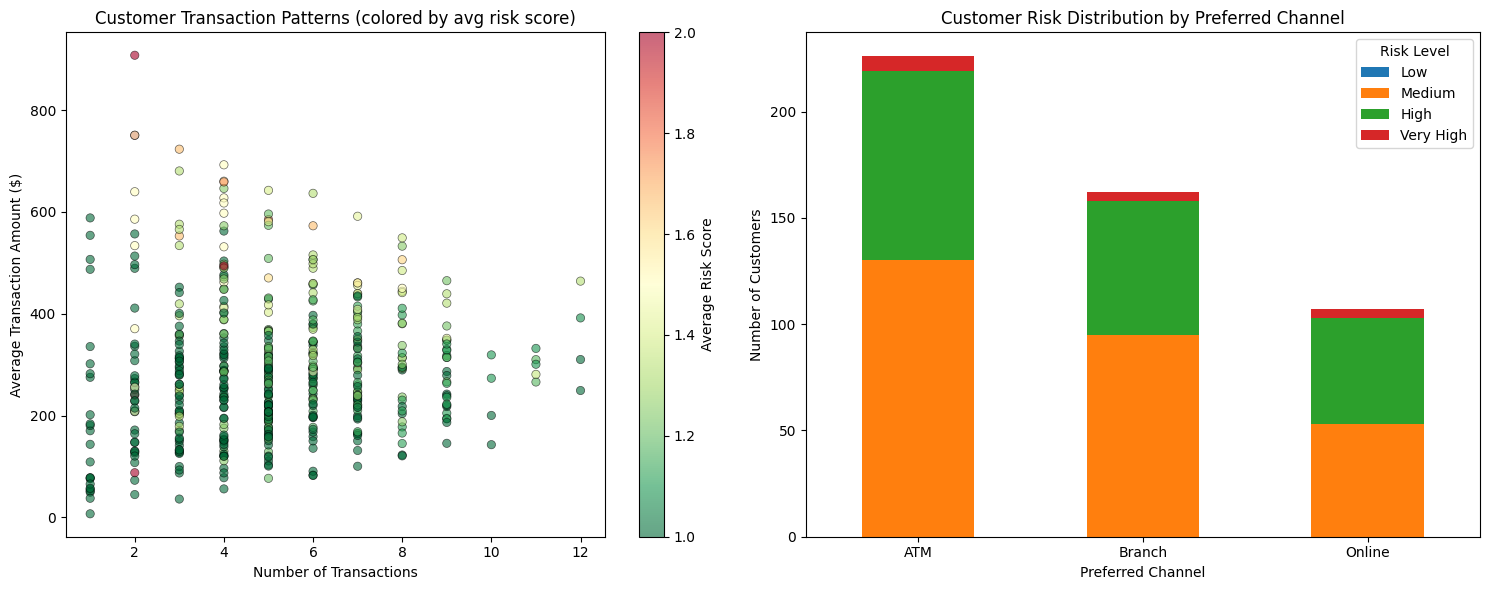

In [72]:
# Cell 16 - Customer Behavior Profiles
print("\n3. CUSTOMER BEHAVIOR PROFILING")

# Calculate customer-level aggregations
customer_profiles = df.groupby('AccountID').agg({
    'TransactionAmount': ['mean', 'std', 'count'],
    'risk_score': ['mean', 'max'],
    'LoginAttempts': 'mean',
    'TransactionDuration': 'mean',
    'TimeSincePrevious': 'mean',
    'Channel': lambda x: x.mode()[0] if len(x) > 0 else 'Unknown',
    'TransactionType': lambda x: x.mode()[0] if len(x) > 0 else 'Unknown'
}).round(2)

# Flatten column names
customer_profiles.columns = ['_'.join(col).strip() for col in customer_profiles.columns.values]
customer_profiles = customer_profiles.rename(columns={
    'TransactionAmount_mean': 'avg_amount',
    'TransactionAmount_std': 'amount_variability',
    'TransactionAmount_count': 'transaction_count',
    'risk_score_mean': 'avg_risk',
    'risk_score_max': 'max_risk',
    'LoginAttempts_mean': 'avg_login_attempts',
    'TransactionDuration_mean': 'avg_duration',
    'TimeSincePrevious_mean': 'avg_time_between',
    'Channel_<lambda>': 'preferred_channel',
    'TransactionType_<lambda>': 'preferred_type'
})

print("Customer Profile Summary:")
print(customer_profiles.describe())

# Identify high-risk customers
high_risk_customers = customer_profiles[customer_profiles['max_risk'] >= 3]
print(f"\nHigh-risk customers: {len(high_risk_customers)} out of {len(customer_profiles)} ({len(high_risk_customers)/len(customer_profiles)*100:.2f}%)")

# Visualize customer segments
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot: Average amount vs transaction count colored by risk
scatter = axes[0].scatter(customer_profiles['transaction_count'], 
                         customer_profiles['avg_amount'],
                         c=customer_profiles['avg_risk'], 
                         cmap='RdYlGn_r', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Average Transaction Amount ($)')
axes[0].set_title('Customer Transaction Patterns (colored by avg risk score)')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Average Risk Score')

# Box plot: Risk levels by preferred channel
risk_levels = pd.cut(customer_profiles['avg_risk'], bins=[0, 0.5, 1, 1.5, 5], 
                     labels=['Low', 'Medium', 'High', 'Very High'])
channel_risk_df = pd.DataFrame({
    'Risk Level': risk_levels,
    'Channel': customer_profiles['preferred_channel']
})
channel_risk_counts = channel_risk_df.groupby(['Channel', 'Risk Level']).size().unstack(fill_value=0)
channel_risk_counts.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Customer Risk Distribution by Preferred Channel')
axes[1].set_xlabel('Preferred Channel')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


4. DEVICE AND IP ADDRESS NETWORK ANALYSIS
Devices used by multiple accounts: 609 out of 681 (89.43%)

Top 10 most shared devices:
          unique_accounts  transaction_count  avg_risk_score
DeviceID                                                    
D000548                 9                  9        1.222222
D000697                 9                  9        1.111111
D000451                 9                  9        1.000000
D000663                 9                  9        1.000000
D000142                 9                  9        1.000000
D000203                 9                  9        1.222222
D000315                 9                  9        1.111111
D000037                 8                  8        1.250000
D000560                 8                  8        1.125000
D000280                 8                  8        1.000000

IPs used from multiple locations: 551 out of 592 (93.07%)


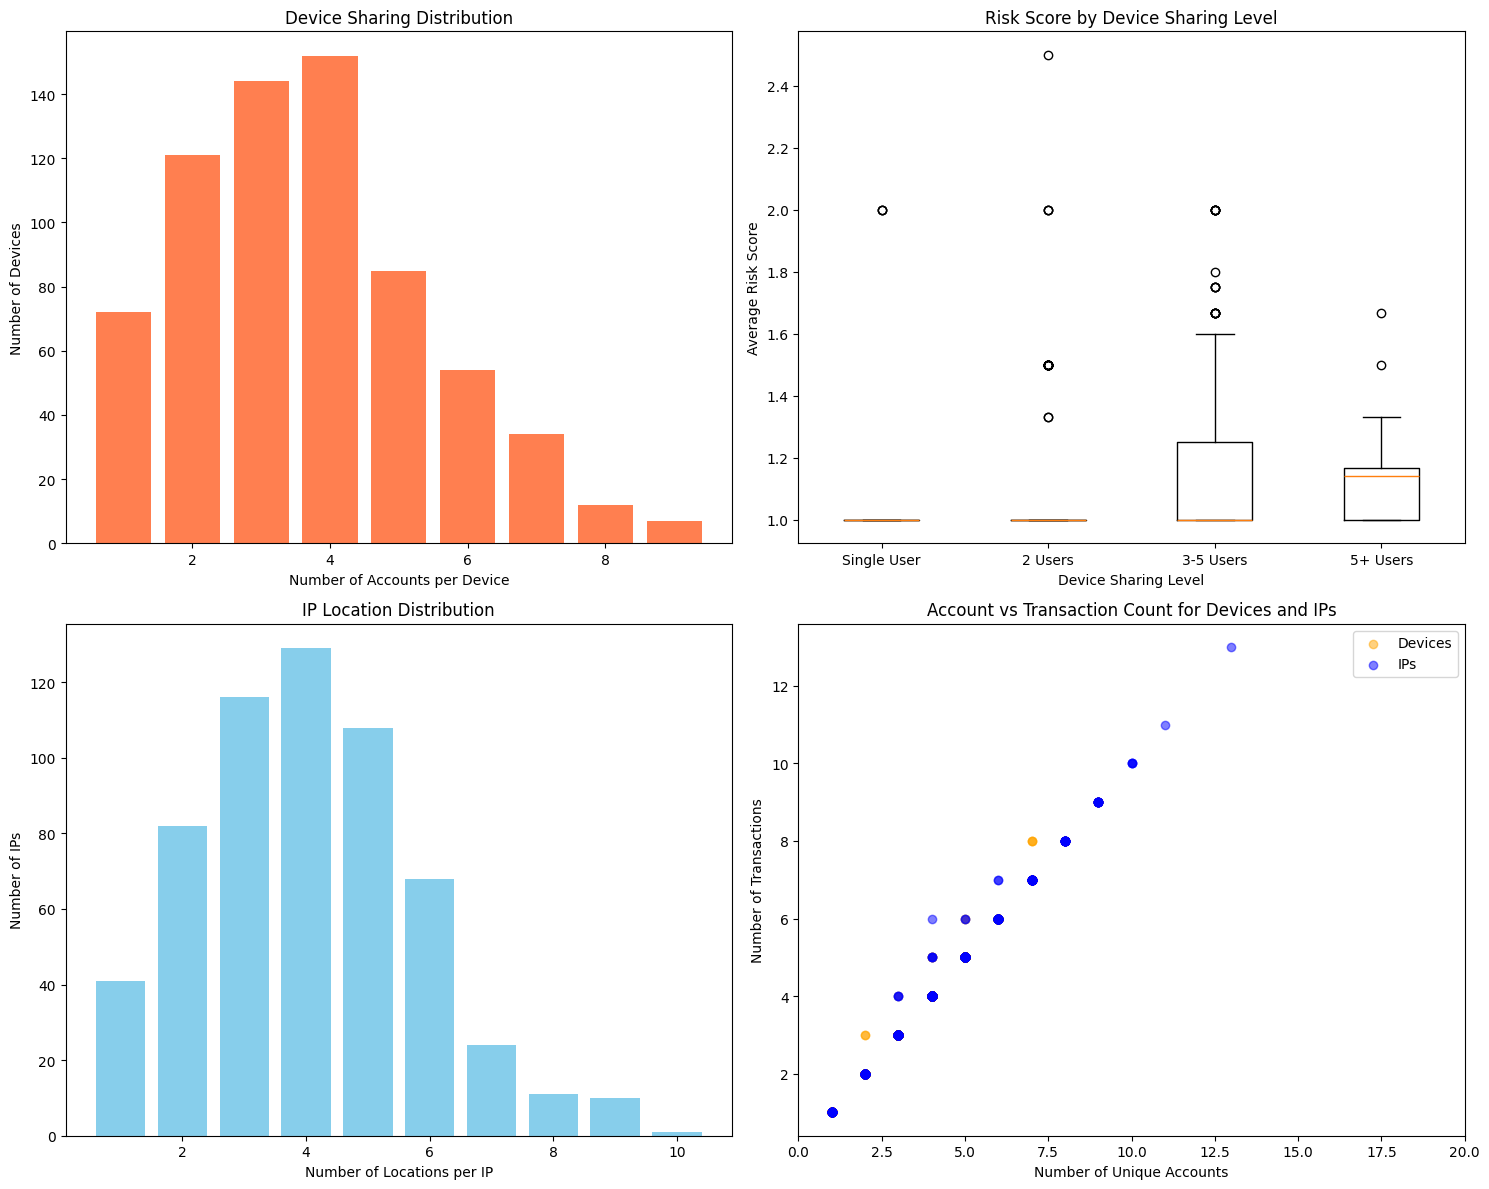

In [73]:
# Cell 17 - Transaction Network Analysis (Device and IP patterns)
print("\n4. DEVICE AND IP ADDRESS NETWORK ANALYSIS")

# Analyze device sharing patterns
device_usage = df.groupby('DeviceID').agg({
    'AccountID': 'nunique',
    'TransactionID': 'count',
    'risk_score': 'mean'
}).rename(columns={
    'AccountID': 'unique_accounts',
    'TransactionID': 'transaction_count',
    'risk_score': 'avg_risk_score'
})

# Find devices used by multiple accounts (potential fraud indicator)
shared_devices = device_usage[device_usage['unique_accounts'] > 1].sort_values('unique_accounts', ascending=False)
print(f"Devices used by multiple accounts: {len(shared_devices)} out of {len(device_usage)} ({len(shared_devices)/len(device_usage)*100:.2f}%)")
print("\nTop 10 most shared devices:")
print(shared_devices.head(10))

# Analyze IP address patterns
ip_usage = df.groupby('IP Address').agg({
    'AccountID': 'nunique',
    'TransactionID': 'count',
    'risk_score': 'mean',
    'Location': lambda x: x.nunique()
}).rename(columns={
    'AccountID': 'unique_accounts',
    'TransactionID': 'transaction_count',
    'risk_score': 'avg_risk_score',
    'Location': 'unique_locations'
})

# Find IPs used from multiple locations (VPN or fraud indicator)
multi_location_ips = ip_usage[ip_usage['unique_locations'] > 1].sort_values('unique_locations', ascending=False)
print(f"\nIPs used from multiple locations: {len(multi_location_ips)} out of {len(ip_usage)} ({len(multi_location_ips)/len(ip_usage)*100:.2f}%)")

# Visualize network patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Device sharing distribution
device_sharing_counts = device_usage['unique_accounts'].value_counts().sort_index()
axes[0, 0].bar(device_sharing_counts.index[:10], device_sharing_counts.values[:10], color='coral')
axes[0, 0].set_xlabel('Number of Accounts per Device')
axes[0, 0].set_ylabel('Number of Devices')
axes[0, 0].set_title('Device Sharing Distribution')

# 2. Risk score by device sharing
device_risk_groups = pd.cut(device_usage['unique_accounts'], bins=[0, 1, 2, 5, 100], 
                           labels=['Single User', '2 Users', '3-5 Users', '5+ Users'])
device_usage['sharing_group'] = device_risk_groups
axes[0, 1].boxplot([device_usage[device_usage['sharing_group'] == group]['avg_risk_score'].values 
                    for group in ['Single User', '2 Users', '3-5 Users', '5+ Users']],
                   labels=['Single User', '2 Users', '3-5 Users', '5+ Users'])
axes[0, 1].set_xlabel('Device Sharing Level')
axes[0, 1].set_ylabel('Average Risk Score')
axes[0, 1].set_title('Risk Score by Device Sharing Level')

# 3. IP location patterns
location_counts = ip_usage['unique_locations'].value_counts().sort_index()
axes[1, 0].bar(location_counts.index[:10], location_counts.values[:10], color='skyblue')
axes[1, 0].set_xlabel('Number of Locations per IP')
axes[1, 0].set_ylabel('Number of IPs')
axes[1, 0].set_title('IP Location Distribution')

# 4. Scatter plot: Accounts vs Transactions for shared devices/IPs
axes[1, 1].scatter(device_usage['unique_accounts'], device_usage['transaction_count'], 
                   alpha=0.5, label='Devices', color='orange')
axes[1, 1].scatter(ip_usage['unique_accounts'], ip_usage['transaction_count'], 
                   alpha=0.5, label='IPs', color='blue')
axes[1, 1].set_xlabel('Number of Unique Accounts')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].set_title('Account vs Transaction Count for Devices and IPs')
axes[1, 1].legend()
axes[1, 1].set_xlim(0, 20)  # Focus on the main cluster

plt.tight_layout()
plt.show()

In [74]:
# Cell 18 - identify high impact categorical features
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

print("CATEGORICAL FEATURE IMPORTANCE")
print("="*80)

categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'MerchantID']
target = 'risk_score'

# Method 1 Random Forest Feature Importance
print("\n1 RANDOM FOREST FEATURE IMPORTANCE")
print("-" * 50)

# Encode categorical variables
le_dict = {}
encoded_features = []
for feature in categorical_features:
    le = LabelEncoder()
    encoded_col = f"{feature}_encoded"
    df[encoded_col] = le.fit_transform(df[feature])
    le_dict[feature] = le
    encoded_features.append(encoded_col)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df[encoded_features], df[target])

# Get feature importances
rf_importance = pd.DataFrame({
    'feature': categorical_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
for _, row in rf_importance.iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")

# Method 2 Mutual Information
from sklearn.feature_selection import mutual_info_regression

print("\n2. MUTUAL INFORMATION")
print("-" * 50)

mi_scores = mutual_info_regression(df[encoded_features], df[target], random_state=42)
mi_results = pd.DataFrame({
    'feature': categorical_features,
    'mutual_info': mi_scores
}).sort_values('mutual_info', ascending=False)

print("Mutual Information Scores:")
for _, row in mi_results.iterrows():
    print(f"  {row['feature']}: {row['mutual_info']:.4f}")

# Method 3 ANOVA F-statistic
from sklearn.feature_selection import f_regression

print("\n3 ANOVA F-STATISTIC")
print("-" * 50)

f_scores, f_pvalues = f_regression(df[encoded_features], df[target])
f_results = pd.DataFrame({
    'feature': categorical_features,
    'f_score': f_scores,
    'p_value': f_pvalues
}).sort_values('f_score', ascending=False)

print("ANOVA F-test Results:")
for _, row in f_results.iterrows():
    print(f"  {row['feature']}: F={row['f_score']:.3f}, p={row['p_value']:.6f}")

# Method 4 Variance analysis by groups
print("\n4 VARIANCE RATIO ANALYSIS")
print("-" * 50)

variance_results = {}
for feature in categorical_features:
    # Calculate between-group and within-group variance
    groups = df.groupby(feature)[target]
    overall_mean = df[target].mean()
    
    # Between-group variance
    group_means = groups.mean()
    group_sizes = groups.size()
    between_var = sum(group_sizes * (group_means - overall_mean)**2) / (len(group_means) - 1)
    
    # Within-group variance
    within_var = sum(groups.var() * (group_sizes - 1)) / (len(df) - len(group_means))
    
    # F-ratio
    f_ratio = between_var / within_var if within_var > 0 else 0
    
    variance_results[feature] = {
        'between_variance': between_var,
        'within_variance': within_var,
        'f_ratio': f_ratio
    }
    
    print(f"{feature}:")
    print(f"  F-ratio: {f_ratio:.3f}")

# Summary comparison
print("\n" + "="*80)
print("FEATURE IMPORTANCE RANKING SUMMARY")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Feature': categorical_features,
    'RandomForest': rf_importance.set_index('feature')['importance'],
    'MutualInfo': mi_results.set_index('feature')['mutual_info'],
    'ANOVA_F': f_results.set_index('feature')['f_score'],
    'Variance_F': [variance_results[f]['f_ratio'] for f in categorical_features]
})

# Normalize scores to 0-1 for comparison
for col in [ 'RandomForest', 'MutualInfo', 'ANOVA_F', 'Variance_F']:
    comparison_df[f'{col}_norm'] = (comparison_df[col] - comparison_df[col].min()) / (comparison_df[col].max() - comparison_df[col].min())

# Calculate average normalized score
comparison_df['Average_Score'] = comparison_df[['RandomForest_norm', 
                                               'MutualInfo_norm', 'ANOVA_F_norm', 'Variance_F_norm']].mean(axis=1)

# Sort by average score
final_ranking = comparison_df.sort_values('Average_Score', ascending=False)

print("\nFinal Feature Importance Ranking (based on average normalized scores):")
for i, (_, row) in enumerate(final_ranking.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Average_Score']:.3f}")
    print(f"   RF: {row['RandomForest']:.3f}, MI: {row['MutualInfo']:.3f}")

# Clean up temporary columns
df.drop(columns=encoded_features, inplace=True)

# MODEL FEATURE RECOMMENDATIONS
print("\n" + "="*80)
print("RECOMMENDED FEATURES FOR MODEL DEVELOPMENT")
print("="*80)

print("\n🎯 PRIMARY FEATURES (Essential for all models):")
print("Numerical Features:")
print("  • TransactionAmount (high correlation with risk: 0.552)")
print("  • LoginAttempts (strong fraud indicator, 4.86% outliers)")
print("  • amount_to_balance_ratio (derived feature, correlation: 0.390)")
print("  • TransactionDuration")
print("  • TimeSincePrevious")

print("\nCategorical Features:")
top_categorical = final_ranking.head(3)['Feature'].tolist()
print(f"  • {top_categorical[0]} (highest importance across methods)")
print(f"  • {top_categorical[1]} (second highest importance)")
print(f"  • {top_categorical[2]} (third highest importance)")

print("\n🔍 SECONDARY FEATURES (For advanced models):")
print("Temporal Features:")
print("  • Hour (strong patterns: 52% at hour 16)")
print("  • DayOfWeek (Monday dominance: 42.6%)")
print("  • Month")

print("\nDerived Features:")
print("  • Customer behavior profiles (from customer-level aggregations)")
print("  • Device/IP sharing indicators (609 shared devices, 551 multi-location IPs)")

print("\n📊 MODEL-SPECIFIC RECOMMENDATIONS:")
print("\n1. SIMPLE MODELS (Logistic Regression, SVM):")
print("   Use top 6-8 features: TransactionAmount, LoginAttempts, amount_to_balance_ratio,")
print(f"   {top_categorical[0]}, {top_categorical[1]}, Hour, TransactionDuration")

print("\n2. TREE-BASED MODELS (Random Forest, XGBoost):")
print("   • All numerical features")
print("   • All categorical features")
print("   • High-cardinality features like DeviceID, IP Address")

print("\n3. ENSEMBLE MODELS:")
print("   Combine multiple feature sets:")
print("   • Base model: Primary features only")
print("   • Advanced model: All features + derived features")
print("   • Specialist model: Network/temporal features")


CATEGORICAL FEATURE IMPORTANCE

1 RANDOM FOREST FEATURE IMPORTANCE
--------------------------------------------------
Random Forest Feature Importance:
  MerchantID: 0.4341
  Location: 0.3396
  Channel: 0.0945
  CustomerOccupation: 0.0778
  TransactionType: 0.0541

2. MUTUAL INFORMATION
--------------------------------------------------
Mutual Information Scores:
  CustomerOccupation: 0.0307
  Location: 0.0119
  Channel: 0.0110
  TransactionType: 0.0000
  MerchantID: 0.0000

3 ANOVA F-STATISTIC
--------------------------------------------------
ANOVA F-test Results:
  CustomerOccupation: F=29.193, p=0.000000
  Location: F=0.558, p=0.455162
  Channel: F=0.266, p=0.606098
  TransactionType: F=0.193, p=0.660747
  MerchantID: F=0.013, p=0.910635

4 VARIANCE RATIO ANALYSIS
--------------------------------------------------
TransactionType:
  F-ratio: 0.193
Location:
  F-ratio: 0.812
Channel:
  F-ratio: 3.005
CustomerOccupation:
  F-ratio: 21.452
MerchantID:
  F-ratio: 0.899

FEATURE IMPORTA